In [7]:
import cv2
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
dataset_path = '/content/drive/MyDrive/5Animals'


idg = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

    # data augmentation

    zoom_range=0.2,
    rotation_range=16,
    horizontal_flip=True

)

train_data = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="training",
    target_size=(224,224),
    # save_to_dir="/content/drive/MyDrive/dataset/animal_test"
)

validation_data = idg.flow_from_directory(
    dataset_path,
    subset="validation",
    target_size=(224,224)
)

Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


In [9]:
width = height = 224

model = tf.keras.applications.InceptionV3(include_top=False,
                                                input_shape=(width,height,3),
                                                weights="imagenet")


87910968/87910968 [==============================] - 5s 0us/step


In [10]:
my_model = models.Sequential([
    model,
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation="tanh"),
    layers.Dense(5, activation="softmax"),
])




In [11]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [12]:
my_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )


history = my_model.fit(train_data,
                    validation_data=validation_data,
                    epochs=20)


Epoch 1/20
33/33 [==============================] - 68s 1s/step - loss: 0.9946 - accuracy: 0.7284 - val_loss: 0.1818 - val_accuracy: 0.9261
Epoch 2/20
33/33 [==============================] - 37s 1s/step - loss: 0.1576 - accuracy: 0.9530 - val_loss: 0.0600 - val_accuracy: 0.9805
Epoch 3/20
33/33 [==============================] - 37s 1s/step - loss: 0.0946 - accuracy: 0.9655 - val_loss: 0.0903 - val_accuracy: 0.9728
Epoch 4/20
33/33 [==============================] - 35s 1s/step - loss: 0.0791 - accuracy: 0.9741 - val_loss: 0.1253 - val_accuracy: 0.9416
Epoch 5/20
33/33 [==============================] - 36s 1s/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0596 - val_accuracy: 0.9728
Epoch 6/20
33/33 [==============================] - 40s 1s/step - loss: 0.0244 - accuracy: 0.9942 - val_loss: 0.0923 - val_accuracy: 0.9689
Epoch 7/20
33/33 [==============================] - 41s 1s/step - loss: 0.0315 - accuracy: 0.9885 - val_loss: 0.0830 - val_accuracy: 0.9728
Epoch 8/20
33/33 [==

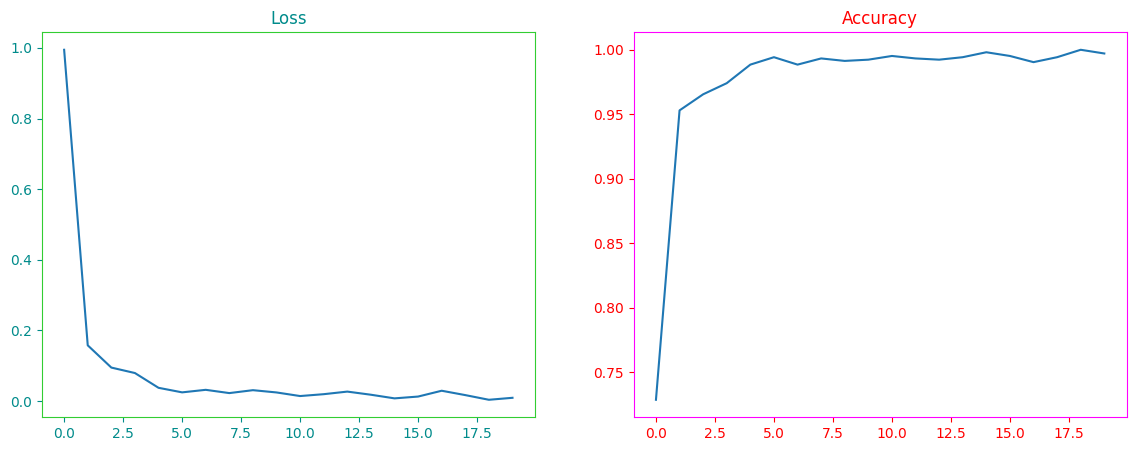

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(history.history['loss'])
ax1.set_title("Loss")
ax1.title.set_color('darkcyan')
ax1.tick_params(axis='x' , colors='darkcyan')
ax1.tick_params(axis='y' , colors='darkcyan')
ax1.spines['bottom'].set_color('limegreen')
ax1.spines['right'].set_color('limegreen')
ax1.spines['left'].set_color('limegreen')
ax1.spines['top'].set_color('limegreen')
ax2.plot(history.history['accuracy'])
ax2.set_title("Accuracy")
ax2.title.set_color('red')
ax2.tick_params(axis='x' , colors='red')
ax2.tick_params(axis='y' , colors='red')
ax2.spines['bottom'].set_color('magenta')
ax2.spines['right'].set_color('magenta')
ax2.spines['left'].set_color('magenta')
ax2.spines['top'].set_color('magenta')
plt.show()

In [21]:
my_model.save('weights/animalـrecognition_transfer_learning_model.h5')

Y_pred = my_model.predict(validation_data)
y_predict = np.argmax(Y_pred , axis=1)



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 9s 911ms/step


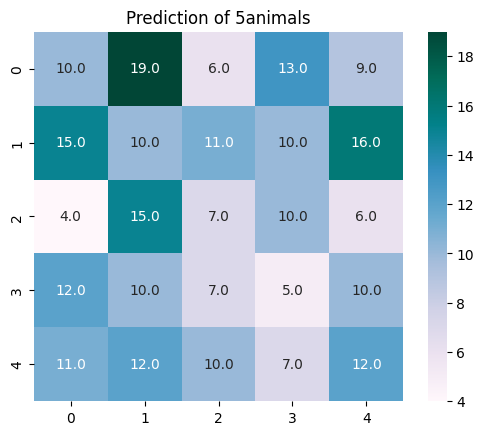

In [22]:
cm = confusion_matrix(validation_data.classes , y_predict)

sns.heatmap(cm , annot=True , cmap='PuBuGn', fmt='.1f')
plt.title("Prediction of 5animals")
plt.imshow(cm)

In [23]:
animal_name=['cat','dog','elephant','giraffe','panda']

In [16]:
image = cv2.imread("/content/drive/MyDrive/5Animals/panda/img.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image , (224,224))
image = image / 255.0
image = image.reshape(1,224,224,3)
output = my_model.predict(image)
pred = np.argmax(output)

if pred == 0:
    print("🐘")
elif pred == 1:
    print("🐶")
elif pred == 2:
    print("🐈")
elif pred == 3:
    print("🦒")
elif pred == 4:
    print("🐼")


1/1 [==============================] - 1s 1s/step
🐼


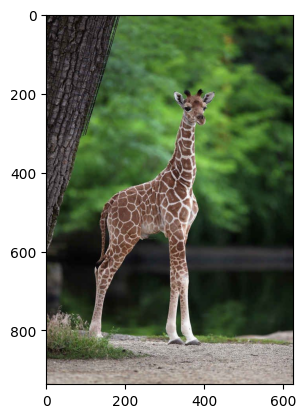

In [26]:
image2 = cv2.imread("/content/drive/MyDrive/5Animals/giraffe/0249adbff36373da1f1e3465583c67d5.jpg")
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
plt.imshow(image2)

In [27]:
image2 = cv2.resize(image2,(width,height))
image2 = image2 / 255.0
image2 = image2.reshape(1,width,height,3)

output = np.argmax(my_model.predict(image2))
animal_name[output]


1/1 [==============================] - 0s 28ms/step


'giraffe'